In [15]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [5]:
model= Sequential()
model.add(Conv2D(32,(3,3), activation='relu', input_shape=(128,128,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(256,(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(38,activation='softmax'))

In [6]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 128)       0

In [7]:
training_history= model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 [==============================] - 1691s 769ms/step - loss: 1.3309 - accuracy: 0.6486 - val_loss: 0.6292 - val_accuracy: 0.8026
Epoch 2/10
2197/2197 [==============================] - 7138s 3s/step - loss: 0.4895 - accuracy: 0.8456 - val_loss: 0.4223 - val_accuracy: 0.8704
Epoch 3/10
2197/2197 [==============================] - 2145s 976ms/step - loss: 0.3395 - accuracy: 0.8929 - val_loss: 0.4406 - val_accuracy: 0.8684
Epoch 4/10
2197/2197 [==============================] - 1647s 750ms/step - loss: 0.2778 - accuracy: 0.9121 - val_loss: 0.4393 - val_accuracy: 0.8706
Epoch 5/10
2197/2197 [==============================] - 1586s 722ms/step - loss: 0.2293 - accuracy: 0.9275 - val_loss: 0.3799 - val_accuracy: 0.8875
Epoch 6/10
2197/2197 [==============================] - 1521s 692ms/step - loss: 0.2116 - accuracy: 0.9335 - val_loss: 0.3328 - val_accuracy: 0.9073
Epoch 7/10
2197/2197 [==============================] - 1599s 728ms/step - loss: 0.1981 - accuracy: 0.9403 - 

In [8]:
model.save("trained_model.keras")

In [9]:
training_history.history

{'loss': [1.3309051990509033,
  0.4895225465297699,
  0.3395306169986725,
  0.2777949273586273,
  0.22933624684810638,
  0.21156631410121918,
  0.1980687826871872,
  0.18450136482715607,
  0.17672701179981232,
  0.1674628108739853],
 'accuracy': [0.6485952138900757,
  0.8455508947372437,
  0.8929368853569031,
  0.9120847582817078,
  0.9274770617485046,
  0.9335088133811951,
  0.9402517676353455,
  0.945671796798706,
  0.9485312104225159,
  0.9525144100189209],
 'val_loss': [0.6291612386703491,
  0.4223380386829376,
  0.44063979387283325,
  0.43929120898246765,
  0.37987440824508667,
  0.3328288793563843,
  0.4523831605911255,
  0.42639634013175964,
  0.5073325037956238,
  0.6740825176239014],
 'val_accuracy': [0.8026405572891235,
  0.8703619241714478,
  0.868427038192749,
  0.870589554309845,
  0.8875483870506287,
  0.9072957038879395,
  0.8913612365722656,
  0.8881174325942993,
  0.8857842087745667,
  0.8754268288612366]}

In [10]:
class_name= validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [11]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [12]:
y_pred=model.predict(test_set)
predicted_categories=tf.argmax(y_pred,axis=1)

550/550 [==============================] - 63s 113ms/step


In [17]:
import tensorflow.compat.v1.keras.backend as K
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
true_categories= tf.concat({y for x,y in test_set},axis=0)
Y_true=tf.argmax(true_categories,axis=1)

RuntimeError: `tf.data.Dataset` only supports Python-style iteration in eager mode or within tf.function.

In [18]:
from keras.preprocessing.image import ImageDataGenerator

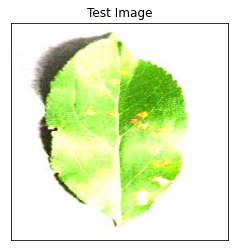

In [19]:
import cv2
image_path= "test/test/AppleCedarRust1.JPG"
img= cv2.imread(image_path)
img= cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()